# Benchmarking to the supporting spreadsheet of Fortin et al. (2015)
- The slight offsets (<1 ppm) result from the fact Fortin use rounded molar masses. We use the same molar masses throughout PySCSS for consistency

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySCSS as ss
pd.options.display.max_columns = None

In [2]:
df=ss.import_data('Fortin_2015.xlsx', sheet_name="PySCSS")

We have replaced all missing liquid oxides and strings with zeros. 


In [3]:
SCSS_F=ss.calculate_Fortin2015_SCSS(df, T_K=df['T_K'], P_kbar=df['P_kbar'])
SCSS_F.head()

,SCSS_ppm_Fortin2015,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,H2O_Liq_mol_frac,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,T_K,P_Gpa,P_kbar,SCSS_Calc
0,1258.458266,0.540235,0.104841,0.001450,0.097590,0.123455,0.083703,0.024498,0.003240,0.020546,0.000444,0.000000,51.5344,2.6056,13.5496,11.131740,0.1633,6.7087,10.9913,2.4106,0.4845,0.0,0.1,0.0,0.0,0.0,0.0,1421.99487,0.1,1.0,1258.335696
1,1224.970304,0.538630,0.103542,0.001460,0.096401,0.123452,0.084574,0.024526,0.003199,0.020284,0.000443,0.003490,51.5230,2.5795,13.7284,11.026481,0.1649,6.6438,11.0214,2.4200,0.4797,0.0,0.1,0.1,0.0,0.0,0.0,1420.69038,0.2,2.0,1224.840235
2,1192.796639,0.537012,0.102250,0.001486,0.095218,0.123460,0.085445,0.024548,0.003157,0.020023,0.000441,0.006960,51.5103,2.5533,13.9081,10.921231,0.1683,6.5791,11.0526,2.4289,0.4748,0.0,0.1,0.2,0.0,0.0,0.0,1419.38991,0.3,3.0,1192.659595
3,1280.385598,0.535398,0.100975,0.001498,0.094049,0.123478,0.086306,0.024562,0.003117,0.019765,0.000440,0.010411,51.4964,2.5274,14.0869,10.816781,0.1701,6.5149,11.0845,2.4370,0.4700,0.0,0.1,0.3,0.0,0.0,0.0,1418.09949,0.0,0.0,1280.227380
4,1130.605929,0.533772,0.099700,0.001525,0.092878,0.123510,0.087178,0.024572,0.003076,0.019507,0.000439,0.013844,51.4810,2.5012,14.2682,10.711441,0.1737,6.4503,11.1178,2.4446,0.4651,0.0,0.1,0.4,0.0,0.0,0.0,1416.80103,0.5,5.0,1130.456481


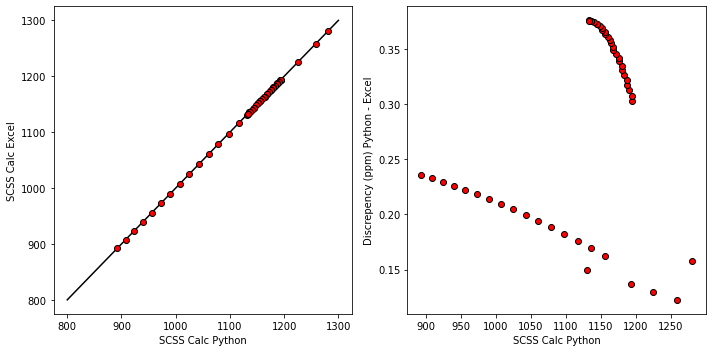

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([800, 1300], [800, 1300], '-k')
ax1.plot(SCSS_F['SCSS_ppm_Fortin2015'], 
         df['SCSS_Calc'],  'ok', mfc='red')
ax1.set_xlabel('SCSS Calc Python')
ax1.set_ylabel('SCSS Calc Excel')

ax2.plot(SCSS_F['SCSS_ppm_Fortin2015'], 
         SCSS_F['SCSS_ppm_Fortin2015']-df['SCSS_Calc'],  'ok', mfc='red')
ax2.set_xlabel('SCSS Calc Python')
ax2.set_ylabel('Discrepency (ppm) Python - Excel')
fig.tight_layout()